Deep Neural Network (DNN) - MNIST dataset
=========================================
---
Introduction au Deep Learning  (IDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## A very simple example of **classification** :
...but a must-have example, a classic !

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## 1/ Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import fidle.pwk as ooo
from importlib import reload

ooo.init()

IDLE 2020 - Practical Work Module
  Version            : 0.2.4
  Run time           : Thursday 30 January 2020, 14:09:56
  Matplotlib style   : fidle/talk.mplstyle
  TensorFlow version : 2.0.0
  Keras version      : 2.2.4-tf


## 2/ Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## 3/ Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


### Have a look

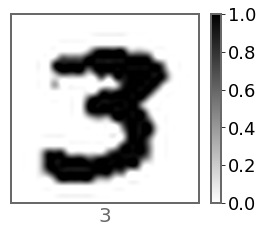

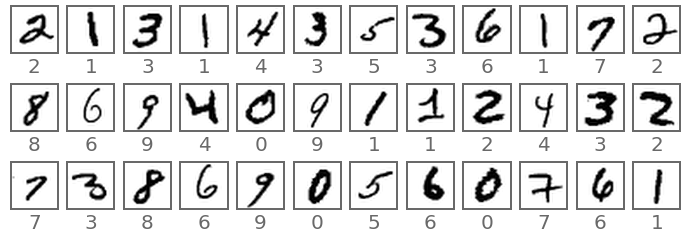

In [4]:
ooo.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True)
ooo.plot_images(x_train, y_train, range(5,41), columns=12)

## 4/ Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5/ Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 1s 20us/sample - loss: 0.5892 - accuracy: 0.8359 - val_loss: 0.2506 - val_accuracy: 0.9284
Epoch 2/16
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2177 - accuracy: 0.9375 - val_loss: 0.1764 - val_accuracy: 0.9479
Epoch 3/16
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1628 - accuracy: 0.9531 - val_loss: 0.1423 - val_accuracy: 0.9586
Epoch 4/16
60000/60000 [==============================] - 1s 9us/sample - loss: 0.1294 - accuracy: 0.9613 - val_loss: 0.1271 - val_accuracy: 0.9626
Epoch 5/16
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1069 - accuracy: 0.9692 - val_loss: 0.1161 - val_accuracy: 0.9655
Epoch 6/16
60000/60000 [==============================] - 1s 9us/sample - loss: 0.0897 - accuracy: 0.9741 - val_loss: 0.1107 - val_accuracy: 0.9667
Epoch 7/16
60000/60000 [==============================] - 1

## 6/ Evaluate
### 6.1/ Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.08116570068981964
Test accuracy : 0.9764


### 6.2/ Plot history

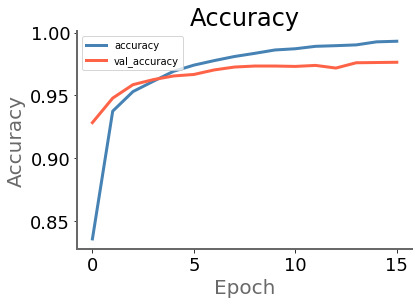

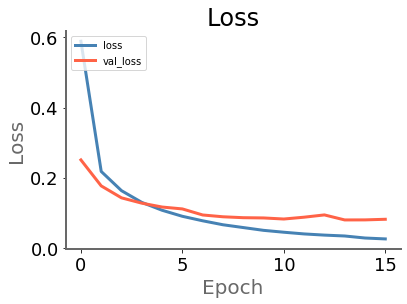

In [9]:
ooo.plot_history(history, figsize=(6,4))

### 6.3/ Plot results

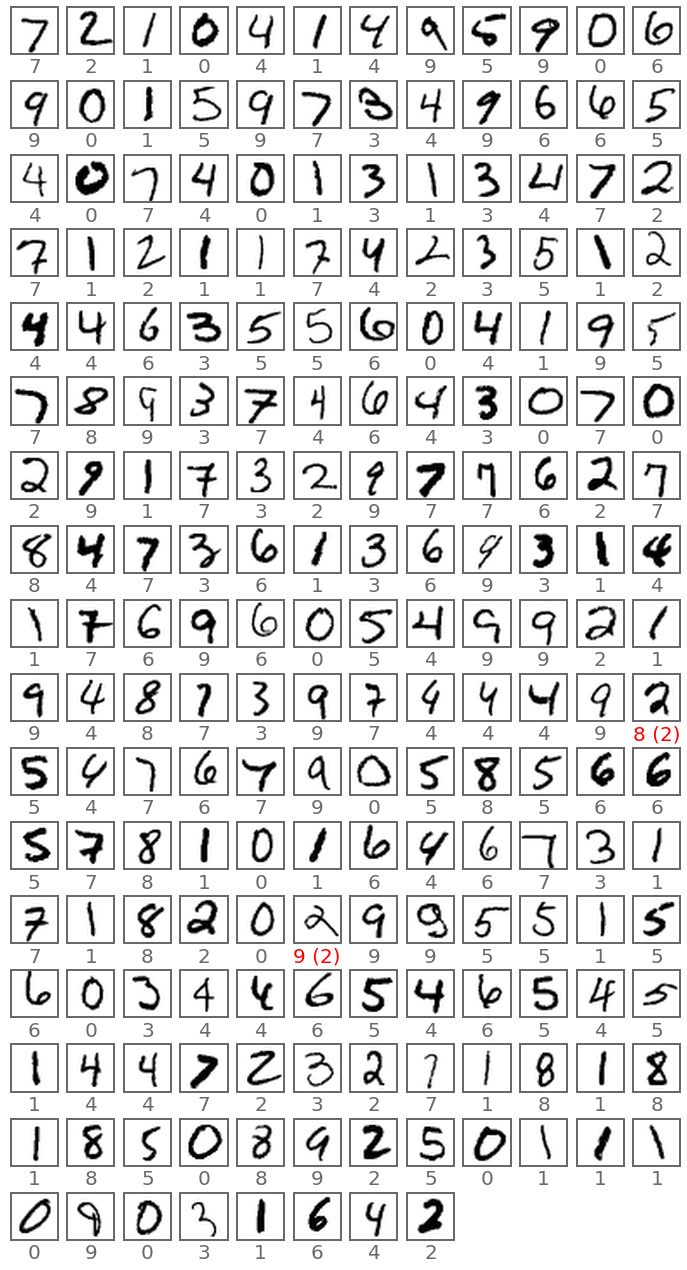

In [10]:
y_pred   = model.predict_classes(x_test)
ooo.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred)

### 6.4/ Plot some errors

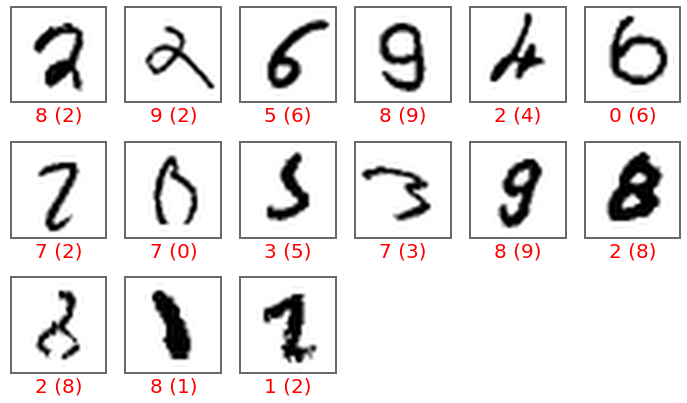

In [11]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
ooo.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred)

In [12]:
ooo.display_confusion_matrix(y_test,y_pred, range(10))

#### Confusion matrix is :

,0,1,2,3,4,5,6,7,8,9
0,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.01,0.01,0.00
3,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.01,0.00,0.00
4,0.00,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.01
5,0.00,0.00,0.00,0.02,0.00,0.96,0.00,0.00,0.01,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00,0.00,0.00
7,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.98,0.01,0.00
8,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.97,0.00
9,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.96


That's all folks !